# 二分割聚类bi-kmeans
2018.07.22:22时-2018.07.26:04时
## 主题概念（略）

## 主要思想  

单一过程来看原理：  关键词是 母簇 子簇  新簇  回到母簇，区分本簇（现有的簇）  
   现有的母簇都有母子分支，从候选集（本簇也是母簇）中选拔误差平方和降低量最大的母簇做分裂，聚类个数增加1。  
   母簇分裂得到两子簇，取代原来的母簇，正式成为新簇。  
   聚类个数达到要求，则可以提交分裂结果。新簇内部还没有二分聚类，如果聚类个数不够，新簇如循环初始一样，继续二分聚类，成为新生的母簇。   
   每次分裂的两个新簇各自二分聚类，生成两簇母子分支，新生的母簇加入到候选待分裂的母簇集中，继续开头所描述的过程。  
   
循环过程切入初始条件：      
初始：单一簇整个为新簇    
新生成的簇切入初始条件，内部二分割聚类，变成新生的母簇。初始的母簇是单一的。  
——母簇概念的明确：具备母子分支，又不分裂，才能称之为母簇。    
获取各母簇的母子分支的误差平方和降低量（在前一步新簇变为母簇时完成计算）    
从多个（非单一）母簇中选降低量最大的那一个分裂    
被分裂的母簇被内部已经二分割聚类生成的子簇（新生成的簇）替代，子簇变为新簇。    
开始循环的第一步是新簇变母簇：  
新簇内部二分割聚类，共得到两簇母子分支。  
每次新的循环的标志事件是：  
新进两簇母簇入选待分裂的母簇集，可以区分出每次循环的不同候选集和不同的分裂结果。  

# 改进的二分聚类 选用的优化目标：母簇分裂的误差平方和降低量
优化目标选择了母簇的母子分支的误差平方和降低量，而不是每个母簇分裂方案的总误差。
类似决策树做分类的信息增益Gain，不同的是非监督方式，其实大道相通。
簇内的误差平方和越小，样本相互越靠近，越纯洁，越容易划分到一类中来。
误差平方和降低量越大，说明得到簇的过程（到达肘部elbow）越快，这一步迈得越大。
SST=SSR+SSE   总离差平方和=簇间（组间）平方和（反映偏差）+簇内（组内）残差平方和（反映方差）
取X=ε^即的误差ε的估计量,根据方差性质E(X^2)=E(X)^2+D(X)，可以得知系统偏差和方差的影响。
这两个理论为选取误差平方和为聚类分析指标提供了尺度上的把握。
极端情况下，单一簇，误差平方和最大，为总离差；
         单样本簇，每个簇只有一个数据，误差平方和最小，为零。
实际聚类情况，误差平方和达到应用要求的某一控制水平。
误差平方和作为聚类的指示指标，是比较方便可行的。

优化目标选择了母簇的母子分支的误差平方和降低量，而不是每个母簇分裂方案的总的误差平方和。这是为了程序选拔母簇有更加方便的针对指标，不需要关注总误差，只要具体到谁。

母簇新生成时都通过二分聚类做了母子分支，并计算了母簇内的误差平方和降低量。
此番改进不像标准的二分聚类程序，缺点是：
每增加一个簇，要把各个母簇重复一次二分聚类，相当的重算一遍误差平方和降低量的工作量，而改进的程序仅对新生的母簇做二分聚类和误差统计。
改进程序的存储空间保留了当前各本簇中心点、全体样本对各簇的从属关系、统计的本簇的误差项。
增加了子簇中心点、各簇内样本对其各子簇的从属关系、子簇内的统计误差项。

时空开销的权衡比较：
空间最明显的增加就是子簇的从属关系，体量相当于全体样本对各簇的从属关系，增加了一倍的空间开销，但压缩了(K-2)的重复二分聚类和误差统计（最后一步K个聚类）的时间开销。

改进的适用情况：
   越多的聚类个数，越需要压缩重复二分聚类和误差统计的时间开销，尽管二分聚类每个母簇的样本数也在减小。改进的误差平方和降低量优化方法更加适合。



 
## 细节问题梳理（因果倒推，上因（准备+条件）下果，目标导向思维。）
聚类细节上的因果关系清理
单一的簇变成母簇                     生成母子分支，但未分裂

初始到正常的母簇数量增长过程   
                               单一母簇直接分裂  
                               不用选择，就是她，没有选择的问题  

正常的分裂过程针对多个非单一的母簇  
                                   新生成的母簇，母簇之间确定  
                                  谁是分裂者，数量至少是2个母簇。  


                                   对分裂的母簇二分割聚类生成子簇    
已有的各未分裂母子分支的误差平方和降低量      计算各母子分支的误差平方和降低量  


已有的母子分支（子簇未分裂出去）            更新的母子分支（子簇分裂出去）  



准备好各母子分支，误差平方和降低量  

 从各母子分支中选拔误差平方和降低量最大的，聚类个数增加1，更新两子簇为母簇。  
 聚类个数达到要求，停止聚类，不再分裂母簇。  
 
 
 
 

## 优化的kmeans数据字典

术语概念空间：  
簇概念空间的划分为两维：本，母，子，新生；中心坐标，所属关系，误差平方项  
数据对象：列表、矩阵、数组；生命周期有初始化，使用，更新（生成）  
数据对象是簇等术语概念的载体。  

术语概念和关系需要根据程序设计来精化，不要搞大而全的覆盖。    
同SQL关系数据库一样要做E-R范式依赖关系的分解。  
为程序执行提供存储结构（安排一定的数据对象），也要为人的审查提供视图（连接查询）。  
E-R分解体现程序设计的精简要义。不能把全连接作为存储和执行单元。  
人机的设计和执行单元划分有所不同，人机各界：人的东西要聚合要包容，机的执行和存储要精当，组合连接要灵活，覆盖人的需求。  


本簇：
本簇（中心坐标，误差平方和SSE） CurrentClusters可分解的复合表
currentCentroids表存放本簇中心点坐标√
ClusterErrorSum表存放误差平方和SSE√
clusterAssment簇所属表，存放所属的簇的中心号，到簇中心的距离平方 √
全体样本与所属簇的从属关系：
样本⁮点 → 簇中心    （所属簇的中心号，到簇中心的距离平方）




母簇：本簇的扩展，程序中本簇的主要代表者，不另行命名
母簇（Index：本簇中心号，子簇中心坐标,分裂后的残差，子簇划分带来的误差平方和降低量）
其中，本簇中心号不用列出，直接排位区分，是索引。
newCluster=[newClusterCentroids ID as Index->,subClusterCentroids,splitedError,ErrorDelta,subclusterAss]
                             √      √          
都可以分解独立成表
最终只取subClusterCentroids,subClusterAss（可导出subClusterErrorSum和splitedError）
subClusterErrorSum=[np.sum(clusterAss[clusterAss[:,0]==i, 1]) for i in [0,1]]

母簇内两种从属关系：
全体样本与所属母簇的从属关系：
样本⁮点 → 母簇中心    （所属母簇的中心号，到母簇中心的距离平方）

subclusterAss子簇所属表 √
簇内样本与子簇的从属关系：
本簇内：
样本⁮点 → 子簇中心（所属子簇的中心号，到子簇中心的距离平方）

#subClusterCentroids,splitedError,subClusterErrorSum,subClusterAss
#=newCluster(ptsInCluster,k=2)#ptsInCluster为准母簇

子簇：
子簇（中心坐标，误差平方和SSE） SubClusters可分解的复合表
subClusterCentroids表存放子簇中心点坐标√
subClusterErrorSum表存放各子簇的误差平方和SSE√    身份只是中间表
用于分裂后，转正为ClusterErrorSum表存放误差平方和SSE


ErrorDelta表 子簇划分带来的误差平方和降低量，二分割新簇得到的新生母簇时生成，用于分裂母簇选拔。

辅助的历史记录表   在母簇分裂时更新
discenter表示被分裂的一代代母簇
 #存储有：中心点，含有的误差平方和，母子分支的误差平方和的降低量，分裂后的残差平方和，初始为np.inf
disCenterIDs表，disCentroids表，disErrorSum表，disErrorDelta表，dissplitedError表

新生簇（初始条件和循环结束条件）newCluster：
新生簇中心表 newClusterCentroids   新生簇的中心点坐标，新生的是两个子簇，故为2组坐标的列表。
新生簇的所属表 newClusterAssment
新生簇的误差平方和newClusterErrorSum 
新生簇在当前簇集中的序号Indexes_of_newClusterCentroids_In_currentCentroids
新生簇没有ErrorDelta表，因为还没有分裂



数据对象的生命周期：
注意区分使用和生成（更新）、初始化，以此为线索检查调试程序。

## 技术小trick
#按：注意：0,1两簇的编号如果直接按照needToSplit和len(currentCentroids) 更新
        #因为newClusterAssment不能区分编号，会出现干扰。
        #为保险起见，needToSplit先不做needToSplit更新，而是采用很大的数值
        #大数值例如needToSplit+10000，替换该编号
        #不出现混淆时，len(currentCentroids) 更新顺利完成后，needToSplit+10000改回needToSplit
        
#注意对空簇的处置   

#按：重点细节 1号子簇要优先更新，以避免与0号子簇的needToSplit=1干扰情况出现：
  0号子簇如果先更新，有可能更新的值needToSplit恰好是1，在1号子簇更新时没有保护，也被更新掉！
#获得剩余数据集的误差
nonSplitedError = np.sum(clusterAssment[np.nonzero(
                clusterAssment[:, 0].A != j)[0]][:, 1])  
                不是从dataSet[np.nonzero(
                clusterAssment[:, 0].A != j)[0]]获取误差
#newCentroids = centroids#.A  #错误源，不能带.A，这是两个子簇的族，源代码有.A （变为数组）

#分组严重的不均衡现象的原因？needToSplit = j的限制  初始化 needToSplit = 0  #提出来
#注意：[0]可以把数据从单元素列表中取出


## %load kmeans.py   加载共享的函数和库

In [1]:
# %load kmeans.py
# kmeans/kmeans.py
import numpy as np

def loadDataSet(filename):
    """
    
    读取数据集

    Args:
        filename: 文件名
    Returns:
        dataMat: 数据样本矩阵
    """
    dataMat = []
    fr = open(filename)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        # 通过map函数批量转换
        #fitLine = map(float, curLine)#py3中改为
        fitLine =list(map(float, curLine))
        dataMat.append(fitLine)
    return dataMat

def distEclud(vecA, vecB):
    """
    计算两向量的欧氏距离

    Args:
        vecA: 向量A
        vecB: 向量B
    Returns:
        欧式距离
    """
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))

def randCent(dataSet, k):
    """
    随机生成k个聚类中心

    Args:
        dataSet: 数据集
        k: 簇数目
    Returns:
        centroids: 聚类中心矩阵
    """
    _, n = dataSet.shape
    centroids = np.mat(np.zeros((k, n)))
    for j in range(n):
        # 随机聚类中心落在数据集的边界之内
        minJ = np.min(dataSet[:, j])
        maxJ = np.max(dataSet[:, j])
#         print('minJ =',minJ )
        rangeJ = float(maxJ - minJ)
        
        centroids[:, j] = minJ + rangeJ * np.random.rand(k, 1)
    return centroids

def kMeans(dataSet, k, maxIter = 5):
    """
    K-Means

    Args:
        dataSet: 数据集
        k: 聚类数
    Returns:
        centroids: 聚类中心
        clusterAssment: 点分配结果
    """
    # 随机初始化聚类中心
    centroids = randCent(dataSet, k)
    m, n = np.shape(dataSet)
    # 点分配结果： 第一列指明样本所在的簇，第二列指明该样本到聚类中心的距离
    clusterAssment = np.mat(np.zeros((m, 2)))#按：开始，各子簇簇号都是0号
    # 标识聚类中心是否仍在改变
    clusterChanged = True
    # 直至聚类中心不再变化
    #按：补充，发现空簇
    kong=k*[0]#各簇 计数，初始值0
    iterCount = 0
    while clusterChanged and iterCount < maxIter:
        iterCount += 1
        clusterChanged = False
        # 分配样本到簇
        for i in range(m):
            # 计算第i个样本到各个聚类中心的距离
            minIndex = 0
            minDist = np.inf
            for j in range(k):
                dist = distEclud(dataSet[i, :],  centroids[j, :])
                if(dist < minDist):
                    minIndex = j
                    minDist = dist
            kong[minIndex]=kong[minIndex] +1       #各簇计数 
            # 判断cluster是否改变
            if(clusterAssment[i, 0] != minIndex):
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist**2
        
        #判断是否有空簇  补充代码
#         for j in range(k):
#             if kong[j]==0:
#                 print('出现第',j,'号空簇')
        # 刷新聚类中心: 移动聚类中心到所在簇的均值位置
        #空簇号kongids
        kongids=[]
        for cent in range(k):  #按：子簇在母簇内部编号cent
            #过滤空簇   补充代码
#             if kong[cent]==0:
#                 print('出现第',j,'号空簇，现在跳过')
#                 kongids.append(cent)#加入空簇号列表
#                 continue
            # 通过数组过滤获得簇中的点
            ptsInCluster = dataSet[np.nonzero(
                clusterAssment[:, 0].A == cent)[0]]  
            #按：clusterAssment[:, 0].A变单列矩阵为数组A
            if ptsInCluster.shape[0] > 0:
                # 计算均值并移动     
                #按：kMeans的由来 适用于数值型变量，本质是取序。
                #因此，为避免极端值对均值的影响，kMeans不是不能用，而是要经过每维序号化预处理。
                #序号化的中值设定为0，小端为负，大端为正。
                centroids[cent, :] = np.mean(ptsInCluster, axis=0) #注： centroids是矩阵,本行可见
    return centroids, clusterAssment#,kong,kongids #分别进行频率计数和空簇统计  
def newCluster(ptsInCluster,k=2):#母簇ptsInCluster生成k=2分割的子簇,母簇号不用携带
    #预备抽象的模块newCluster(ptsInCluster,k),
    #返回newCluster=[newClusterCentroids,subClusterCentroids,splitedError,ErrorDelta,subclusterAss]
    centroids, clusterAss = kMeans(ptsInCluster, k)
    #按：此步为优化考虑点，不需要每次新增一簇就对全部的旧簇反复做二分聚类，仅仅针对新增的簇做二分聚类，并保存。
    # 获得划分后的误差之和
    
    #不再承担老簇的统计，只需要统计本簇的新残差平方和
#     m=len(ptsInCluster)
#     centroid0 = np.mean(ptsInCluster, axis=0).tolist()[0]
#     clusterAssment = np.mat(np.zeros((m, 2)))
#     for j in range(m):
#         clusterAssment[j, 1] = distEclud(ptsInCluster[j, :], np.mat(centroid0))**2             
#     oldClusterAssment=clusterAssment
#     oldClusterErrorSum=np.sum(oldClusterAssment[:, 1])  
            
    splitedError= np.sum(clusterAss[:, 1])#新残差平方和
#     ErrorDelta=oldClusterErrorSum-splitedError#不承担统计此功能
#[[np.sum([a[i][1] for i in  range(len(a)) if a[i][0]==j])] for j in [0,1]] #可行的参考
    subClusterErrorSum=[[np.sum([clusterAss[i,1] for i in  range(len(clusterAss)) 
                                 if clusterAss[i,0]==j])] for j in [0,1]]   
    subClusterCentroids=centroids
    subClusterAss=clusterAss

    #以下两个等效动作是分裂动作，从子簇身份生成新簇，这是在选拔过程中完成的
    #本过程是要确定母子分支，当好母簇。
    #动作1
#     newCluster0=[subClusterCentroids.tolist()[0],[],splitedError,ErrorDelta,subclusterAss]
#     newCluster1=[subClusterCentroids.tolist()[1],[],splitedError,ErrorDelta,subclusterAss]
#     newCluster=[newCluster0,newCluster1]
    #动作2
#     newCluster=[]
#     for i in [0,1]:
#         print(subClusterCentroids[i],'/n',i)        
#         newCluster.append([subClusterCentroids[i],[],splitedError,ErrorDelta,subclusterAss[i]])
#         #extend是对列表；append是对元素
    #正确动作：返回母子分支，当好母簇
#     newCluster=[[],subClusterCentroids,splitedError,ErrorDelta,subclusterAss]
    #ErrorDelta不在放入了，改为subClusterErrorSum
    newCluster=[subClusterCentroids,splitedError,subClusterErrorSum,subClusterAss]
    print('type(subClusterCentroids)=',type(subClusterCentroids))
    print('本身type(subClusterAss)=',type(subClusterAss))#矩阵
                        #但在优化的。。。，下游，缺失#type of newClusterAssment= <class 'list'>
    
    return newCluster  

## 标准的biKmeans    原load的py文件已改好

In [ ]:
def biKmeans(dataSet, k):     #ok的
    """
    二分kmeans算法
    Args:
        dataSet: 数据集
        k: 聚类数
    Returns:
        centroids: 聚类中心
        clusterAssment: 点分配结果
    """
    m, n = np.shape(dataSet)
    # 起始时，只有一个簇，该簇的聚类中心为所有样本的平均位置
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    # 设置一个列表保存当前的聚类中心
    currentCentroids = [centroid0]
    # 点分配结果： 第一列指明样本所在的簇，第二列指明该样本到聚类中心的距离
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 初始化点分配结果，默认将所有样本先分配到初始簇
    for j in range(m):
        clusterAssment[j, 1] = distEclud(dataSet[j, :], np.mat(centroid0))**2
    # 直到簇的数目达标
    while len(currentCentroids) < k:
        # 当前最小的代价
        lowestError = np.inf
        # 对于每一个簇
        for j in range(len(currentCentroids)):
            # 获得该簇的样本
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == j)[0], :]
            print('ptsInCurrCluster.shape=',ptsInCurrCluster.shape)
            # 在该簇上进行2-means聚类
            # 注意，得到的centroids，其聚类编号含0，1
            centroids, clusterAss = kMeans(ptsInCurrCluster, 2)
            # 获得划分后的误差之和
            splitedError = np.sum(clusterAss[:, 1])
            '''
            # 获得其他簇的样本
            ptsNoInCluster = dataSet[np.nonzero(
                clusterAssment[:, 0].A != j)[0]]
            # 获得剩余数据集的误差
            nonSplitedError = np.sum(ptsNoInCluster[:, 1])
            '''
            # 获得剩余数据集的误差
            nonSplitedError = np.sum(clusterAssment[np.nonzero(
                clusterAssment[:, 0].A != j)[0]][:, 1])
            
            print("splitedError, and nonSplitedError: ",splitedError,nonSplitedError)
            # 比较，判断此次划分是否划算
            if (splitedError + nonSplitedError) < lowestError:
                # 记录当前的应当划分的簇
                needToSplit = j
                # 新获得的簇以及点分配结果
                newCentroids = centroids#.A    #按：0,1两族子簇
#                 newCentroids = centroids#.A  #错误源，不是.A，源代码有.A
                newClusterAss = clusterAss.copy()
                # 如果划算，刷新总误差
                lowestError = splitedError + nonSplitedError


        # 更新簇的分配结果   
        #按：重点细节 1号子簇要优先更新，以避免与needToSplit=1干扰：
        #0号子簇如果先更新，有可能更新的值needToSplit恰好是1，在1号子簇更新时没有保护，也被更新掉！
        # 第1簇应当修正为最新一簇
        newClusterAss[np.nonzero(newClusterAss[:, 0].A == 1)[
            0], 0] = len(currentCentroids)
        # 第0簇应当修正为被划分的簇
        newClusterAss[np.nonzero(newClusterAss[:, 0].A == 0)[
            0], 0] = needToSplit

        print( 'the bestCentToSplit -needToSplit is: ', needToSplit)
        print ('the len of bestClustAss -newClusterAss is: ', len(newClusterAss))
        # 被划分的簇需要更新
        currentCentroids[needToSplit] = newCentroids[0, :].tolist()[0]#加了.tolist()[0]
        # 加入新的划分后的簇
        currentCentroids.append(newCentroids[1, :].tolist()[0])#加了.tolist()[0]
        # 刷新点分配结果
        clusterAssment[np.nonzero(
            clusterAssment[:, 0].A == needToSplit
        )[0], :] = newClusterAss
    return np.mat(currentCentroids), clusterAssment


## 扩展一下biKmeans

In [ ]:
def biKmeans(dataSet, k):  #有小幅改动  运行ok！
    """
    二分kmeans算法
    Args:
        dataSet: 数据集
        k: 聚类数
    Returns:
        centroids: 聚类中心
        clusterAssment: 点分配结果
    """
    #按：二分kmeans有不均衡聚类的倾向。
    m, n = np.shape(dataSet)
    # 起始时，只有一个簇，该簇的聚类中心为所有样本的平均位置
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    # 设置一个列表保存当前的聚类中心
    currentCentroids = [centroid0]
    # 点分配结果： 第一列指明样本所在的簇，第二列指明该样本到聚类中心的距离
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 初始化点分配结果，默认将所有样本先分配到初始簇
    for j in range(m):
        clusterAssment[j, 1] = distEclud(dataSet[j, :], np.mat(centroid0))**2
    # 直到簇的数目达标
    J=0
    TotalError=[]
    
    while len(currentCentroids) < k:
        # 当前最小的代价
#         lowestError = np.inf
        HighestError=0
        TotalError.append(0)
        Delta=[]#按：补充测试，存放DeltaErro
        for j in range(len(currentCentroids)):
             TotalError[J]+=clusterAssment[j, 1]
                
        # 对于每一个簇
        for j in range(len(currentCentroids)):
            # 获得该簇的样本
            ptsInCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == j)[0], :]
#             print('ptsInCluster:',ptsInCluster)#按：补充测试
            print('len(ptsInCluster)',len(ptsInCluster))
            ptsInClusterError = np.sum(ptsInCluster[:, 1])
#             if len(ptsInCluster)==0:#空簇处置：新增代码 删除该中心，跳到下一for j循环
#                 del(currentCentroids[j])
#                 continue
            # 在该簇上进行2-means聚类
            # 注意，得到的centroids，其聚类编号含0，1
            
            centroids, clusterAss = kMeans(ptsInCluster, 2)#按：权衡，时间和空间
            # 获得划分后的误差之和
            splitedError = np.sum(clusterAss[:, 1])
            DeltaError0=ptsInClusterError-splitedError
            Delta.append(DeltaError0)
            #求平均的误差降落
            DeltaError= DeltaError0/(len(ptsInCluster)-1)
            
            #按：原文错误，下行做了替换
            '''
            # 获得其他簇的样本
            ptsNoInCluster = dataSet[np.nonzero(
                clusterAssment[:, 0].A != j)[0]]
            # 获得剩余数据集的误差
            nonSplitedError = np.sum(ptsNoInCluster[:, 1])
                        # 获得其他簇的样本
            ptsNoInCluster = dataSet[np.nonzero(
                clusterAssment[:, 0].A != j)[0]]
            # 获得剩余数据集的误差
            nonSplitedError = np.sum(ptsNoInCluster[:, 1])
            '''
            # 获得剩余数据集的误差  #按：替换的这一行
            nonSplitedError = np.sum(clusterAssment[np.nonzero(
                clusterAssment[:, 0].A != j)[0]][:, 1])           
                        
            # 比较，判断此次划分是否划算
#             if DeltaError/TotalError[J]<lowestError:
#             if DeltaError<lowestError:
            if DeltaError<HighestError:
#                 lowestError=DeltaError/TotalError[J]
#                 lowestError=DeltaError
                HighestError=DeltaError
#             if (splitedError + nonSplitedError) < lowestError:
#                 # 如果划算，刷新总误差
#                 lowestError = splitedError + nonSplitedError
                # 记录当前的应当划分的簇
                needToSplit = j
                # 新获得的簇以及点分配结果
                newCentroids = centroids#.A  #错误源，不是.A，源代码有.A
                newClusterAss = clusterAss.copy()#按：三个位置，搞不好就出错
        # 更新簇的分配结果  #注意顺序，子簇1优先，不会串扰
        # 第1簇应当修正为最新一簇
        newClusterAss[np.nonzero(newClusterAss[:, 0].A == 1)[
            0], 0] = len(currentCentroids)
        # 第0簇应当修正为被划分的簇
        newClusterAss[np.nonzero(newClusterAss[:, 0].A == 0)[
            0], 0] = needToSplit

        # 被划分的簇需要更新
        currentCentroids[needToSplit] = newCentroids[0, :].tolist()[0]#加了.tolist()[0]
        # 加入新的划分后的簇
        currentCentroids.append(newCentroids[1, :].tolist()[0])#加了.tolist()[0]
        # 刷新点分配结果
        clusterAssment[np.nonzero(
            clusterAssment[:, 0].A == needToSplit
        )[0], :] = newClusterAss
#         print('currentCentroids=',currentCentroids)#按：补充测试
        J+=1
        print('第',J,'轮的len of newClusterAss=',len(newClusterAss))
        print('取代第',needToSplit,'号母簇','0号子簇长度',len(newClusterAss[:, 0].A == 0))
            #不堆叠，k类不会分开展示。位置放在最后return前更新更适宜  注意与return并头
#     currentCentroids=np.vstack(currentCentroids)
    print('Delta=',Delta)
    return np.mat(currentCentroids), clusterAssment

## 本人优化的biKmeans_

In [ ]:
def biKmeans_(dataSet, k):   #按：改进二分聚类，不需要每次新增一簇就对全部的旧簇反复做二分聚类。
    """
    二分kmeans算法
    Args:
        dataSet: 数据集
        k: 聚类数
    Returns:
        centroids: 聚类中心
        clusterAssment: 点分配结果
    """
    m, n = np.shape(dataSet)
    # 起始时，只有一个簇，该簇的聚类中心为所有样本的平均位置
    
    #本簇的初始化，包括中心，所属，误差三项
#     CurrentClusters=[]#初始化为分割前的当前的簇列表  #复合表，取消掉
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    # 设置一个列表保存当前的聚类中心
    currentCentroids = [centroid0]
    # 点分配结果： 第一列指明样本所在的簇，第二列指明该样本到聚类中心的距离
 
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 初始化点分配结果，默认将所有样本先分配到初始簇
    for j in range(m):
        clusterAssment[j, 1] = distEclud(dataSet[j, :], np.mat(centroid0))**2
	#循环初始化新簇，补充的代码
    #新簇是为了二分支形成母簇而用

    ClusterErrorSum=[[]]#此表存放误差平方和SSE  不能是[]
    
    
    #子簇：
    #子簇（中心坐标，误差平方和SSE） SubClusters可分解的复合表 ，未使用
    #子簇的初始化，也包括中心，所属，误差三项   
    subClusterCentroids=[[]]#子簇中心坐标表
    subClusterAss=[[]]      #子簇所属表（所属子簇中心号，误差平方），可导出下列二项：
    subClusterErrorSum=[[]]  #各子簇的误差平方和
    splitedError=[[]]        #母簇分裂后的误差平方和，上述两子簇误差平方和相加
    ErrorDelta=[[]]  #初始误差平方和降低量
    #注：[[]]的初始值比[]有更多的灵活性，不是一直append，还可以杀回马枪从取空[]的a[i].append()添加元素



    #新生簇的初始化，也包括中心，所属，误差三项 ，为了和循环衔接  
    newClusterCentroids=currentCentroids 
    newClusterAssment=clusterAssment
    newClusterErrorSum=np.sum(newClusterAssment[:, 1]) #新簇的误差平方和
    Indexes_of_newClusterCentroids_In_currentCentroids=[0]#新生簇在当前簇集中的序号
#     ClusterErrorSum.append(newClusterErrorSum)#错误，改为下面的
    ClusterErrorSum[0].append(newClusterErrorSum)

    
#     辅助的历史记录表   在母簇分裂时更新
#     discenter=[] #可能直接用不上，是复合表
    #初值可取[newClusterCentroids,newClusterErrorSum]   
    #存储有：中心点，含有的误差平方和，母子分支的误差平方和的降低量，分裂后的残差平方和
    #disCenterIDs表，disCentroids表，disErrorSum表，disErrorDelta表，dissplitedError表
    disCenterIDs=[]
    disCentroids=[]
    disErrorSum=[]
    disErrorDelta=[]
    dissplitedError=[]
    
    needToSplit = 0 #提出来   初始化
 
    # 直到簇的数目达标
    while len(currentCentroids) < k:
    # 直到簇的数目达标
#     if len(currentCentroids) < k:    #按：要<而不是≤，循环结束时就已经生成全部k个中心点，k-1+1=k个簇
        # 当前最小的代价
        highestErrorDelta = 0
        # 对于每一个簇    #按：改为，对每一个新簇，存储二分聚类的两个子簇，还有误差平方和及其二分聚类的降低量。     
    
        for j in Indexes_of_newClusterCentroids_In_currentCentroids:
            # 获得该簇的样本           
#             ptsInCluster = dataSet[np.nonzero(newClusterAssment[:, 0].A == j)[0], :]
            ptsInCluster = dataSet[np.nonzero(clusterAssment[:,0].A == j)[0], :]
            # 在该簇上进行2-means聚类
            newClusterPre=newCluster(ptsInCluster,2)      
            #返回subClusterCentroids,splitedError,subClusterErrorSum,subclusterAss
            #                二立 ， 单立，           二立，         原样本混沌不分
#             print('newClusterPre[3]=',newClusterPre[3])
            print('type(newClusterPre[3])=',type(newClusterPre[3]))
            #按：测试结果： type(newClusterPre[3])= <class 'numpy.matrixlib.defmatrix.matrix'>
            subClusterCentroids[j].extend(newClusterPre[0])#更新j的[] ,这是二立情况
            #按：要注意append和extend的区别！extend针对列表合并，append针对元素的追加
            print('append的subClusterCentroids=',subClusterCentroids[j])
            #append的subClusterCentroids= [[matrix([[-0.2897198 , -2.83942545]])]]
            splitedError[j].append(newClusterPre[1])
            subClusterErrorSum[j].append(newClusterPre[2])#这是二立情况
#             subClusterAss[j].append(newClusterPre[3]) #按：[j]不可省掉，否则反复乱下去。重点细节
            subClusterAss[j].append(newClusterPre[3]) #  不宜用extend，否则得到一行行materix碎片
            print('ClusterErrorSum[',j,']=',ClusterErrorSum[j])#得 ClusterErrorSum[ 0 ]= [1465.5800234838164]
            print('splitedError[',j,']=',splitedError[j]) #得 splitedError[ 0 ]= [828.6926539968681]
            print('ClusterErrorSum[',j,'][0]=',ClusterErrorSum[j][0])#得 ClusterErrorSum[ 0 ]= [1465.5800234838164]
            print('splitedError[',j,'][0]=',splitedError[j][0]) #得 splitedError[ 0 ]= [828.6926539968681]
            ErrorDelta[j].append((ClusterErrorSum[j][0]-splitedError[j][0]))#这是单立情况
            #注意：[0]可以把数据从单元素列表中取出
            #             ErrorDelta[j].append([ClusterErrorSum[j]-splitedError[j]])#原始写法出错
            #出错TypeError: unsupported operand type(s) for -: 'list' and 'list'

        # 比较，判断此次划分是否划算
#         currentClusters=np.mat(CurrentClusters) #当前的簇矩阵
#             print('currentClusters[j,:]',currentClusters[j,:])
        print('&&&&&&&&&&&&&&&&&&&&&&ErrorDelta&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&')
        print(ErrorDelta)
        for j in range(len(currentCentroids)):	
            #needToSplit = j #不应放在此处，会导致不均衡
            if ErrorDelta[j][0] >highestErrorDelta :#& len(currentCentroids)>1:
                #ErrorDelta[j] >....写法出错TypeError: '>' not supported between instances of 'list' and 'int'
                #按：currentClusters[j,3]即ErrorDelta
                # 如果还有更大降低量，刷新误差平方和的最大降低量
                highestErrorDelta = ErrorDelta[j][0]
                print('ErrorDelta[',j,'][0]=',ErrorDelta[j][0])
                # 记录当前的应当划分的簇
                needToSplit = j
                # 新获得的簇以及点分配结果  #按：选拔要分裂的那个母簇
        print('needToSplit=',needToSplit)
#         print('subClusterAss[needToSplit]=',subClusterAss[needToSplit])
#         newCentroids =currentCentroids[needToSplit] #按：两组子簇中心按子簇号0、1排列   错误，这是单簇了
        newCentroids =subClusterCentroids[needToSplit] #按：两组子簇中心按子簇号0、1排列
        print('newCentroids=',newCentroids)
        print('type of newCentroids=',type(newCentroids))
#         newClusterAssment =clusterAssment[needToSplit]#按：子簇所属子簇号0或1，距离子簇中心平方不用动
        newClusterAssment =subClusterAss[needToSplit][0] #按：列表subClusterAss[needToSplit]取首元素，加[0]
#         print('newClusterAssment=',newClusterAssment)
        print('工作点 type of newClusterAssment=',type(newClusterAssment))
        #按：newClusterAssment =subClusterAss[needToSplit]的
        #测试结果为 type of newCentroids= <class 'list'>，后面的矩阵用法要加上[0]
        print('len of newClusterAssment=',len(newClusterAssment))
        #重点：找到错误根源所属关系矩阵或表，不能直接用needToSplit来给，它不是序号或行号，而是元素的首位数值
        print('clusterAssment[np.where(clusterAssment[:,0]==needToSplit)[0],:].shape=',
              clusterAssment[np.where(clusterAssment[:,0]==needToSplit)[0],:].shape)        
#         print('待分裂的currentCentroids[needToSplit]=',currentCentroids[needToSplit])
        print('currentCentroids=',currentCentroids)
        print('len(currentCentroids)=',len(currentCentroids),'选第',needToSplit,'号母簇')
        print('下面的0、1子簇，中心为：',newCentroids)
        '''
        '''
        # 第1簇应当修正为最新一簇
        newClusterAssment[np.nonzero(newClusterAssment[:, 0].A == 1)[
            0], 0] =len(currentCentroids) 
        #TypeError: list indices must be integers or slices, not tuple 
        #出错源在newClusterAssment更新用了[[]]，而不是[]!
        # 第0簇应当修正为被划分的簇
        newClusterAssment[np.nonzero(newClusterAssment[:, 0].A == 0)[  #按：np.nonzero()，()内非零的逻辑判断，取逻辑真。
            0], 0]=needToSplit  
        #保护0号子簇，前面1号子簇的序号len(currentCentroids)>0 ，不会冲突。 
        #反过来，先更新0号子簇为needToSplit，如果needToSplit恰好为1，接下来更新1号子簇时，继续被更新。
        
        #len(np.nonzero(newClusterAssment[:, 0].A == 1)[0])*[len(currentCentroids)]
        #按：len(currentCentroids) ?不对
        #按：实际的簇号增加了，从len(currentCentroids)-1变为len(currentCentroids)
        
        #以下两行废弃，改为第三行
        #newClusterErrorSum=[]
        #newClusterErrorSum.extend(subClusterErrorSum[needToSplit])#注意：这里不是append,不针对元素，而是列表
        newClusterErrorSum=subClusterErrorSum[needToSplit][0]
        #仿效 newClusterAssment =subClusterAss[needToSplit][0]，不用下面的
#         newClusterErrorSum.append(subClusterErrorSum[needToSplit])#注意：这里不是append,不针对元素，而是列表
        print('newClusterErrorSum=',newClusterErrorSum,'for needToSplit=',needToSplit)
        #测得newClusterErrorSum= [[[466.63278133614426], [326.28407520118242]]] for needToSplit= 0
#         print('检查newClusterAssment种类',np.unique(newClusterAssment[:, 0].A))
        '''
        
        '''
        #本簇更新：分裂的母簇更新为新簇：
        #保存历史记录（中心号，中心点坐标，误差项）
        #依次更新两子簇的：误差项，从属关系，中心点
        
        # 1/4        分裂的母簇更新之前保存历史记录
                #         被选的母簇的分裂动作，善后安排
        
        disCenterIDs.append(needToSplit)
        disCentroids.append(currentCentroids[needToSplit])
        disErrorSum.append(ClusterErrorSum[needToSplit])
        disErrorDelta.append(ErrorDelta[needToSplit])#按：其更新在新簇二分割聚类生成母簇时进行
        dissplitedError.append(splitedError[needToSplit])#按：其更新在新簇二分割聚类生成母簇时进行
        
        #2/4 误差项更新   注意区分使用和生成（更新）
        #检查，已做掉的：
        #ErrorDelta（确定分裂母簇时使用）
        #splitedError、subClusterErrorSum 各子簇的误差平方和  新簇二分支形成母簇时使用，生成则在母簇分裂时
        print('newClusterErrorSum[0]=',newClusterErrorSum[0])#测得 newClusterErrorSum[0]= [32.601242864951153]
        ClusterErrorSum[needToSplit]=newClusterErrorSum[0]
        ClusterErrorSum.append(newClusterErrorSum[1])
        
        splitedError[needToSplit]=[]
        splitedError.append([])
        subClusterErrorSum[needToSplit]=[]
        subClusterErrorSum.append([]) 
        ErrorDelta[needToSplit]=[]
        ErrorDelta.append([]) 
        
        #3/4 从属关系更新    包括本簇的和分裂的子簇的
        #本簇的从属关系更新
        # 刷新点分配结果    #按：所属簇号  即从属关系更新
        print('$$$$$$$$$$$$$$$$$$$$$本簇的从属关系更新$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
        print('len of newClusterAssment=',len(newClusterAssment))
        print('len of clusterAssment: needToSplit=',len(clusterAssment[np.nonzero(
            clusterAssment[:, 0].A == needToSplit
        )[0], :]))
        clusterAssment[np.nonzero(
            clusterAssment[:, 0].A == needToSplit
        )[0], :] = newClusterAssment  
        print('np.unique(newClusterAssment[:, 0].A)=',np.unique(newClusterAssment[:, 0].A))
        print('np.unique(clusterAssment[:, 0].A)=',np.unique(clusterAssment[:, 0].A ))
        #按：原簇簇号为needToSplit的样本被新的二分簇族（注意：是族）
        #                                             newClusterAss取代
        #簇号不变  
        #按：discenter表示被分裂的一代代母簇
        #存储有：中心点，含有的误差平方和，母子分支的误差平方和的降低量
        #子簇的从属关系更新
        subClusterAss[needToSplit]=[]#注意：不是[[]]
        subClusterAss.extend([[]])
        #4/4 中心点更新,包括本簇中心点更新currentCentroids和子簇中心点更新subClusterCentroids（重点：不能忽视）
        #本簇中心点更新currentCentroids
#         print('currentCentroids[needToSplit]=',currentCentroids[needToSplit])
         # 被划分的簇需要更新
        currentCentroids[needToSplit] = newCentroids[0]#.tolist()[0]#加了.tolist()[0]
        # 加入新的划分后的簇
        print('newCentroids[1]=',newCentroids[1]) #按：newCentroids[1]是单坐标点的列表[[单坐标点]]
        #newCentroids[1]= [[-3.38237045 -2.9473363 ]]  #返回一单行的矩阵[[]]  #重点关注，矩阵而非列表
#         currentCentroids.extend(newCentroids[1])#.tolist()[0])#加了.tolist()[0] #按：注意append和extend差别
        currentCentroids.append(newCentroids[1])#.tolist()[0]
        print('currentCentroids[-1]',currentCentroids[-1])
        print('currentCentroids[-1][0]',currentCentroids[-1][0])
        #子簇中心点更新subClusterCentroids
        subClusterCentroids[needToSplit]=[]
#         subClusterCentroids.extend([])  #按：考察功底的时刻
#         subClusterCentroids.extend([])    #按：等于什么也没干
        subClusterCentroids.extend([[]])  #按：增加了空位，即插入了[]，该序号i是可以用[i]append()来补充元素的
#         subClusterCentroids.append([[]])  #按：增加了元素[[]]，插入的是空元素的单元素表
        print('subClusterCentroids=',subClusterCentroids)
      
  
        #按：一对分裂的子簇变成一对新生簇，内部二分割变成待选分裂的母簇
#         newClusterCentroids=[]
#         newClusterCentroids.append(currentCentroids[needToSplit])
#         newClusterCentroids.append(currentCentroids[-1])
        Indexes_of_newClusterCentroids_In_currentCentroids=[needToSplit,len(currentCentroids)-1]
        print('Indexes_of_newClusterCentroids_In_currentCentroids=',Indexes_of_newClusterCentroids_In_currentCentroids)    
        print('currentCentroids=',currentCentroids)
        print('#####################################################################################')

      
        

    #不堆叠，k类不会分开展示。位置放在最后return前更新更适宜  注意与return并头
    currentCentroids=np.vstack(currentCentroids)
#         currentCentroids
    print('最终的ErrorDelta=',ErrorDelta)
    print('最终的disErrorDelta=',disErrorDelta)
        
#     return np.mat(currentCentroids), clusterAssment
    return np.mat(currentCentroids), clusterAssment

# 主调main  ：作为测试口

运行时间 0.2689971923828125


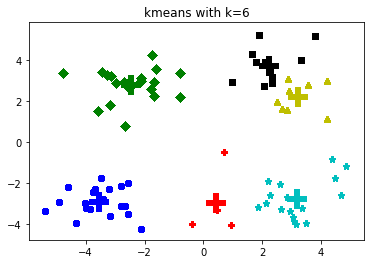

In [12]:
# %load test_normal_kmeans.py
# kmeans/test_normal_kmeans.py
import time as tm
import kmeans
import numpy as np
import matplotlib.pyplot as plt
#按：在Notepad++中运行python脚本 cmd /k D:\ProgramData\Anaconda2\envs\py3\python.exe "$(FULL_CURRENT_PATH)" & PAUSE & EXIT
if __name__ == "__main__":
    s=tm.time()
    dataMat = np.mat(loadDataSet('data/testSet.txt'))#kmeans.
    centroids, clusterAssment = kMeans(dataMat,6) 
    #6运行时间 0.2689971923828125
    #6运行时间 0.2850019931793213
    #6运行时间 0.2919943332672119
    #kmeans.2运行时间  0.08598971366882324
#     centroids, clusterAssment = biKmeans(dataMat, 6)
    #6运行时间 0.39299678802490234
    #6运行时间 0.42099523544311523
    #6运行时间 0.3880009651184082 
    #2运行时间 0.072998046875
#     centroids, clusterAssment = biKmeans_(dataMat,6)  
    #6运行时间 0.3679966926574707  
    #6运行时间 0.3579981327056885
    #6运行时间 0.28999781608581543  
    #2运行时间 0.11799740791320801
    clusterCount = np.shape(centroids)[0]
    m = np.shape(dataMat)[0]
    print('运行时间',tm.time()-s)
    # 绘制散点图
    patterns = ['o', 'D', '^', 's','*','P','H','x']   #discent消失的中心备用'v'倒三角
    colors = ['b', 'g', 'y', 'black','c','r','m','w']
    #补充：颜色参数：
#b--blue    c--cyan    g--green  k--black
#m--magenta r--red     w--white  y--yellow
    fig = plt.figure()
    title = 'kmeans with k='+str(clusterCount)
    ax = fig.add_subplot(111, title=title)
    for k in range(clusterCount):
        # 绘制聚类中心    #color='r修改，以便辨认
        #空簇处理放在biKmeans等中
        ax.scatter(centroids[k, 0], centroids[k, 1], color=str(colors[k]), marker='+', linewidth=20)
        for i in range(m):
            # 绘制属于该聚类中心的样本
            ptsInCluster = dataMat[np.nonzero(clusterAssment[:, 0].A==k)[0]]
            ax.scatter(ptsInCluster[:, 0].flatten().A[0], ptsInCluster[:, 1].flatten().A[0], marker=patterns[k], color=colors[k])
    plt.show()


# 汇总各种方案

## 专门biKmeans代码      ok的！
https://www.cnblogs.com/MrLJC/p/4129700.html 

In [ ]:
def biKmeans(dataSet, k, distMeas=distEclud):
    #def distEclud(vecA, vecB):
    m =np.shape(dataSet)[0]
    clusterAssment =np.mat(np.zeros((m,2)))#记录簇分配的结果及误差
    centroid0 =np.mean(dataSet, axis=0).tolist()[0]#计算整个数据集的质心
    centList =[centroid0] #create a list with one centroid
    for j in range(m):#计算初始聚类点与其他点的距离
        clusterAssment[j,1] = distMeas(np.mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):#尝试划分每一簇
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]#get the data points currently in cluster i
#             ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]
            print('ptsInCurrCluster.shape=',ptsInCurrCluster.shape)            
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2)#后面参数, distMeas)#对这个簇运行一个KMeans算法，k=2
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:##划分后更好的话
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #更新簇的分配结果change 1 to 3,4, or whatever
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print( 'the bestCentToSplit is: ',bestCentToSplit)
        print ('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return np.mat(centList), clusterAssment

## 标准biKmeans

In [2]:
def biKmeans(dataSet, k):     #ok的
    """
    二分kmeans算法
    Args:
        dataSet: 数据集
        k: 聚类数
    Returns:
        centroids: 聚类中心
        clusterAssment: 点分配结果
    """
    m, n = np.shape(dataSet)
    # 起始时，只有一个簇，该簇的聚类中心为所有样本的平均位置
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    # 设置一个列表保存当前的聚类中心
    currentCentroids = [centroid0]
    # 点分配结果： 第一列指明样本所在的簇，第二列指明该样本到聚类中心的距离
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 初始化点分配结果，默认将所有样本先分配到初始簇
    for j in range(m):
        clusterAssment[j, 1] = distEclud(dataSet[j, :], np.mat(centroid0))**2
    # 直到簇的数目达标
    while len(currentCentroids) < k:
        # 当前最小的代价
        lowestError = np.inf
        # 对于每一个簇
        for j in range(len(currentCentroids)):
            # 获得该簇的样本
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == j)[0], :]
            print('ptsInCurrCluster.shape=',ptsInCurrCluster.shape)
            # 在该簇上进行2-means聚类
            # 注意，得到的centroids，其聚类编号含0，1
            centroids, clusterAss = kMeans(ptsInCurrCluster, 2)
            # 获得划分后的误差之和
            splitedError = np.sum(clusterAss[:, 1])
            '''
            # 获得其他簇的样本
            ptsNoInCluster = dataSet[np.nonzero(
                clusterAssment[:, 0].A != j)[0]]
            # 获得剩余数据集的误差
            nonSplitedError = np.sum(ptsNoInCluster[:, 1])
            '''
            # 获得剩余数据集的误差
            nonSplitedError = np.sum(clusterAssment[np.nonzero(
                clusterAssment[:, 0].A != j)[0]][:, 1])
            
            print("splitedError, and nonSplitedError: ",splitedError,nonSplitedError)
            # 比较，判断此次划分是否划算
            if (splitedError + nonSplitedError) < lowestError:
                # 记录当前的应当划分的簇
                needToSplit = j
                # 新获得的簇以及点分配结果
                newCentroids = centroids#.A
                newClusterAss = clusterAss.copy()
                # 如果划算，刷新总误差
                lowestError = splitedError + nonSplitedError


        # 更新簇的分配结果
        # 第1簇应当修正为最新一簇
        newClusterAss[np.nonzero(newClusterAss[:, 0].A == 1)[
            0], 0] = len(currentCentroids)
        # 第0簇应当修正为被划分的簇
        newClusterAss[np.nonzero(newClusterAss[:, 0].A == 0)[
            0], 0] = needToSplit
        print( 'the bestCentToSplit -needToSplit is: ', needToSplit)
        print ('the len of bestClustAss -newClusterAss is: ', len(newClusterAss))
        # 被划分的簇需要更新
        currentCentroids[needToSplit] = newCentroids[0, :].tolist()[0]#加了.tolist()[0]
        # 加入新的划分后的簇
        currentCentroids.append(newCentroids[1, :].tolist()[0])#加了.tolist()[0]
        # 刷新点分配结果
        clusterAssment[np.nonzero(
            clusterAssment[:, 0].A == needToSplit
        )[0], :] = newClusterAss
    return np.mat(currentCentroids), clusterAssment

## 提出的改进二分聚类

In [4]:
def biKmeans_(dataSet, k):   #按：改进二分聚类，不需要每次新增一簇就对全部的旧簇反复做二分聚类。
    """
    二分kmeans算法
    Args:
        dataSet: 数据集
        k: 聚类数
    Returns:
        centroids: 聚类中心
        clusterAssment: 点分配结果
    """
    m, n = np.shape(dataSet)
    # 起始时，只有一个簇，该簇的聚类中心为所有样本的平均位置    
    #本簇的初始化，包括中心，所属，误差三项
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    # 设置一个列表保存当前的聚类中心
    currentCentroids = [centroid0]
    # 点分配结果： 第一列指明样本所在的簇，第二列指明该样本到聚类中心的距离 
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 初始化点分配结果，默认将所有样本先分配到初始簇
    for j in range(m):
        clusterAssment[j, 1] = distEclud(dataSet[j, :], np.mat(centroid0))**2
	#循环初始化新簇，补充的代码
    #新簇是为了二分支形成母簇而用
    
    ClusterErrorSum=[[]]#此表存放误差平方和SSE  不能是[]
    #子簇：
    #子簇（中心坐标，误差平方和SSE） SubClusters可分解的复合表 ，未使用
    #子簇的初始化，也包括中心，所属，误差三项   
    subClusterCentroids=[[]]#子簇中心坐标表
    subClusterAss=[[]]      #子簇所属表（所属子簇中心号，误差平方），可导出下列二项：
    subClusterErrorSum=[[]]  #各子簇的误差平方和
    splitedError=[[]]        #母簇分裂后的误差平方和，上述两子簇误差平方和相加
    ErrorDelta=[[]]  #初始误差平方和降低量

    #新生簇的初始化，也包括中心，所属，误差三项 ，为了和循环衔接  
    newClusterCentroids=currentCentroids 
    newClusterAssment=clusterAssment
    newClusterErrorSum=np.sum(newClusterAssment[:, 1]) #新簇的误差平方和
    Indexes_of_newClusterCentroids_In_currentCentroids=[0]#新生簇在当前簇集中的序号
#     ClusterErrorSum.append(newClusterErrorSum)#错误，改为下面的
    ClusterErrorSum[0].append(newClusterErrorSum)
    
#     辅助的历史记录表   在母簇分裂时更新
#     discenter=[] #可能直接用不上，是复合表
    #初值可取[newClusterCentroids,newClusterErrorSum]   
    #存储有：中心点，含有的误差平方和，母子分支的误差平方和的降低量，分裂后的残差平方和
    #disCenterIDs表，disCentroids表，disErrorSum表，disErrorDelta表，dissplitedError表
    disCenterIDs=[]
    disCentroids=[]
    disErrorSum=[]
    disErrorDelta=[]
    dissplitedError=[]
    
    needToSplit = 0  #提出来
 
    # 直到簇的数目达标
    while len(currentCentroids) < k:
    # 直到簇的数目达标
#     if len(currentCentroids) < k:    #按：要<而不是≤，循环结束时就已经生成全部k个中心点，k-1+1=k个簇
        # 当前最小的代价
        highestErrorDelta = 0
        # 对于每一个簇    #按：改为，对每一个新簇，存储二分聚类的两个子簇，还有误差平方和及其二分聚类的降低量。    
    
        for j in Indexes_of_newClusterCentroids_In_currentCentroids:
            # 获得该簇的样本           
            ptsInCluster = dataSet[np.nonzero(clusterAssment[:,0].A == j)[0], :]
            # 在该簇上进行2-means聚类
            newClusterPre=newCluster(ptsInCluster,2)      
            #返回subClusterCentroids,splitedError,subClusterErrorSum,subclusterAss
            print('type(newClusterPre[3])=',type(newClusterPre[3]))
            #按：测试结果： type(newClusterPre[3])= <class 'numpy.matrixlib.defmatrix.matrix'>
            subClusterCentroids[j].extend(newClusterPre[0])#更新j的[] 
            #按：要注意append和extend的区别！extend针对列表合并，append针对元素的追加
            print('append的subClusterCentroids=',subClusterCentroids[j])
            #append的subClusterCentroids= [[matrix([[-0.2897198 , -2.83942545]])]]
            splitedError[j].append(newClusterPre[1])
            subClusterErrorSum[j].append(newClusterPre[2])
#             subClusterAss[j].append(newClusterPre[3]) #按：[j]不可省掉，否则反复乱下去。重点细节
            subClusterAss[j].append(newClusterPre[3]) #  不宜用extend，否则得到一行行materix碎片
            print('ClusterErrorSum[',j,'][0]=',ClusterErrorSum[j][0])
            print('splitedError[',j,'][0]=',splitedError[j][0]) 
            ErrorDelta[j].append((ClusterErrorSum[j][0]-splitedError[j][0]))

        # 比较，判断此次划分是否划算
        for j in range(len(currentCentroids)):	
#             needToSplit = j#不能放在此处，否则大块的簇分割不掉！
            if ErrorDelta[j][0] >highestErrorDelta:# & len(currentCentroids)>1:
                # 如果还有更大降低量，刷新误差平方和的最大降低量
                highestErrorDelta = ErrorDelta[j][0]
                # 记录当前的应当划分的簇
                needToSplit = j
                # 新获得的簇以及点分配结果  #按：选拔要分裂的那个母簇
#         newCentroids =currentCentroids[needToSplit] #按：两组子簇中心按子簇号0、1排列   错误，这是单簇了
        newCentroids =subClusterCentroids[needToSplit] #按：两组子簇中心按子簇号0、1排列
        print('newCentroids=',newCentroids)
        print('type of newCentroids=',type(newCentroids))
        newClusterAssment =subClusterAss[needToSplit][0] 
#         print('newClusterAssment=',newClusterAssment)
        print('工作点 type of newClusterAssment=',type(newClusterAssment))
        #按：newClusterAssment =subClusterAss[needToSplit]的
        #测试结果为 type of newCentroids= <class 'list'>，后面的矩阵用法要加上[0]
        print('len of newClusterAssment=',len(newClusterAssment))
        #重点：找到错误根源所属关系矩阵或表，不能直接用needToSplit来给，它不是序号或行号，而是元素的首位数值
        print('clusterAssment[np.where(clusterAssment[:,0]==needToSplit)[0],:].shape=',
              clusterAssment[np.where(clusterAssment[:,0]==needToSplit)[0],:].shape)        
        print('currentCentroids=',currentCentroids)
        print('len(currentCentroids)=',len(currentCentroids),'选第',needToSplit,'号母簇')
        print('下面的0、1子簇，中心为：',newCentroids)
        '''
        '''
        # 第1簇应当修正为最新一簇
        newClusterAssment[np.nonzero(newClusterAssment[:, 0].A == 1)[
            0], 0] =len(currentCentroids) #TypeError: list indices must be integers or slices, not tuple
        # 第0簇应当修正为被划分的簇
        newClusterAssment[np.nonzero(newClusterAssment[:, 0].A == 0)[  #按：np.nonzero()，()内非零的逻辑判断，取逻辑真。
            0], 0]=needToSplit  

        #以下两行废弃，改为第三行
        #newClusterErrorSum=[]
        #newClusterErrorSum.extend(subClusterErrorSum[needToSplit])#注意：这里不是append,不针对元素，而是列表
        newClusterErrorSum=subClusterErrorSum[needToSplit][0]
        #仿效 newClusterAssment =subClusterAss[needToSplit][0]，不用下面的
#         newClusterErrorSum.append(subClusterErrorSum[needToSplit])#注意：这里不是append,不针对元素，而是列表
        print('newClusterErrorSum=',newClusterErrorSum,'for needToSplit=',needToSplit)
        #测得newClusterErrorSum= [[[466.63278133614426], [326.28407520118242]]] for needToSplit= 0

        
        #本簇更新：分裂的母簇更新为新簇：
        #保存历史记录（中心号，中心点坐标，误差项）
        #依次更新两子簇的：误差项，从属关系，中心点
        
        # 1/4        分裂的母簇更新之前保存历史记录      
        disCenterIDs.append(needToSplit)
        disCentroids.append(currentCentroids[needToSplit])
        disErrorSum.append(ClusterErrorSum[needToSplit])
        disErrorDelta.append(ErrorDelta[needToSplit])#按：其更新在新簇二分割聚类生成母簇时进行
        dissplitedError.append(splitedError[needToSplit])#按：其更新在新簇二分割聚类生成母簇时进行
        
        #2/4 误差项更新   注意区分使用和生成（更新）
        #检查，已做掉的：
        #ErrorDelta（确定分裂母簇时使用）
        #splitedError、subClusterErrorSum 各子簇的误差平方和  新簇二分支形成母簇时使用，生成则在母簇分裂时
        print('newClusterErrorSum[0]=',newClusterErrorSum[0])#测得 newClusterErrorSum[0]= [32.601242864951153]
        ClusterErrorSum[needToSplit]=newClusterErrorSum[0]
        ClusterErrorSum.append(newClusterErrorSum[1])        
        #以下的要加上
        splitedError[needToSplit]=[]
        splitedError.append([])
        subClusterErrorSum[needToSplit]=[]
        subClusterErrorSum.append([]) 
        ErrorDelta[needToSplit]=[]
        ErrorDelta.append([]) 
        
        
        
        #3/4 从属关系更新    包括本簇的和分裂的子簇的
        #本簇的从属关系更新
        # 刷新点分配结果    #按：所属簇号  即从属关系更新
        clusterAssment[np.nonzero(
            clusterAssment[:, 0].A == needToSplit
        )[0], :] = newClusterAssment  
        print('np.unique(newClusterAssment[:, 0].A)=',np.unique(newClusterAssment[:, 0].A))
        print('np.unique(clusterAssment[:, 0].A)=',np.unique(clusterAssment[:, 0].A ))
        #按：原簇簇号为needToSplit的样本被新的二分簇族（注意：是族）
        #                                             newClusterAss取代
        #簇号不变  
        #按：discenter表示被分裂的一代代母簇
        #存储有：中心点，含有的误差平方和，母子分支的误差平方和的降低量
        #子簇的从属关系更新
        subClusterAss[needToSplit]=[]  #不能是[[]]，否则出错
        subClusterAss.extend([[]])
        
        #4/4 中心点更新,包括本簇中心点更新currentCentroids和子簇中心点更新subClusterCentroids（重点：不能忽视）
        #本簇中心点更新currentCentroids
#         print('currentCentroids[needToSplit]=',currentCentroids[needToSplit])
         # 被划分的簇需要更新
        currentCentroids[needToSplit] = newCentroids[0]#.tolist()[0]#加了.tolist()[0]
        # 加入新的划分后的簇
        print('newCentroids[1]=',newCentroids[1]) #按：newCentroids[1]是单坐标点的列表[[单坐标点]]
        #newCentroids[1]= [[-3.38237045 -2.9473363 ]]  #返回一单行的矩阵[[]]  #重点关注，矩阵而非列表
#         currentCentroids.extend(newCentroids[1])#.tolist()[0])#加了.tolist()[0] #按：注意append和extend差别
        currentCentroids.append(newCentroids[1])#.tolist()[0]
        print('currentCentroids[-1]',currentCentroids[-1])
        print('currentCentroids[-1][0]',currentCentroids[-1][0])
        #子簇中心点更新subClusterCentroids
        subClusterCentroids[needToSplit]=[]
#         subClusterCentroids.extend([])  #按：考察功底的时刻
#         subClusterCentroids.extend([])    #按：等于什么也没干
        subClusterCentroids.extend([[]])  #按：增加了空位，即插入了[]，该序号i是可以用[i]append()来补充元素的
#         subClusterCentroids.append([[]])  #按：增加了元素[[]]，插入的是空元素的单元素表
        print('subClusterCentroids=',subClusterCentroids)
      
  
        #按：一对分裂的子簇变成一对新生簇，内部二分割变成待选分裂的母簇
        Indexes_of_newClusterCentroids_In_currentCentroids=[needToSplit,len(currentCentroids)-1]
        print('Indexes_of_newClusterCentroids_In_currentCentroids=',Indexes_of_newClusterCentroids_In_currentCentroids)    
        print('currentCentroids=',currentCentroids)
        print('#####################################################################################')

    #不堆叠，k类不会分开展示。位置放在最后return前更新更适宜  注意与return并头
    currentCentroids=np.vstack(currentCentroids)
    return np.mat(currentCentroids), clusterAssment